# Exploración de datos/ Ingeniería de características

# Librerías

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

## Carga de datos

In [3]:
dataframe = pd.read_csv("dataset_feature_engineering.csv")
print("Dimensiones:", dataframe.shape)
dataframe.head()

Dimensiones: (1852394, 35)


,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,first_time_at_merchant,dist_between_client_and_merch,trans_month,trans_day,hour,year,times_shopped_at_merchant,times_shopped_at_merchant_year,times_shopped_at_merchant_month,times_shopped_at_merchant_day
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,True,78.773821,1,1,0,2019,5,4,2,1
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,True,30.216618,1,1,0,2019,4,4,1,1
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,True,108.102912,1,1,0,2019,4,3,1,1
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,True,95.685115,1,1,0,2019,1,1,1,1
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,True,77.702395,1,1,0,2019,6,1,1,1


In [4]:
dataframe.info()
dataframe.isnull().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 35 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   cc_num                           int64  
 1   merchant                         object 
 2   category                         object 
 3   amt                              float64
 4   first                            object 
 5   last                             object 
 6   gender                           object 
 7   street                           object 
 8   city                             object 
 9   state                            object 
 10  zip                              int64  
 11  lat                              float64
 12  long                             float64
 13  city_pop                         int64  
 14  job                              object 
 15  dob                              object 
 16  trans_num                        object 
 17  unix_tim

cc_num                             0
dist_between_client_and_merch      0
is_fraud                           0
amt_month                          0
amt_year                           0
amt_month_shopping_net_spend       0
count_month_shopping_net           0
first_time_at_merchant             0
trans_month                        0
merch_lat                          0
trans_day                          0
hour                               0
year                               0
times_shopped_at_merchant          0
times_shopped_at_merchant_year     0
times_shopped_at_merchant_month    0
merch_long                         0
unix_time                          0
merchant                           0
city                               0
category                           0
amt                                0
first                              0
last                               0
gender                             0
street                             0
state                              0
t

In [5]:
dataframe['cc_num'] = dataframe['cc_num'].astype(str)
dataframe['zip'] = dataframe['zip'].astype(str)
dataframe['dob'] = pd.to_datetime(dataframe['dob'], errors='coerce')
dataframe['is_fraud'] = dataframe['is_fraud'].astype(bool)
dataframe['first_time_at_merchant'] = dataframe['first_time_at_merchant'].astype(bool)

# columnas categoricas
categoricalCols = ['merchant', 'category', 'gender', 'state', 'job', 'city']
dataframe[categoricalCols] = dataframe[categoricalCols].astype('category')

# columnas numericas
numericIntCols = ['city_pop', 'trans_month', 'trans_day', 'hour', 'year',
            'times_shopped_at_merchant', 'times_shopped_at_merchant_year',
            'times_shopped_at_merchant_month', 'times_shopped_at_merchant_day']
dataframe[numericIntCols] = dataframe[numericIntCols].astype('Int64')
numericFloatCols = ['amt', 'lat', 'long', 'merch_lat', 'merch_long',
              'amt_month', 'amt_year', 'amt_month_shopping_net_spend',
              'dist_between_client_and_merch']
dataframe[numericFloatCols] = dataframe[numericFloatCols].astype(float)


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 35 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   cc_num                           object        
 1   merchant                         category      
 2   category                         category      
 3   amt                              float64       
 4   first                            object        
 5   last                             object        
 6   gender                           category      
 7   street                           object        
 8   city                             category      
 9   state                            category      
 10  zip                              object        
 11  lat                              float64       
 12  long                             float64       
 13  city_pop                         Int64         
 14  job                              c

In [7]:
dataframe.describe(include='all')

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,first_time_at_merchant,dist_between_client_and_merch,trans_month,trans_day,hour,year,times_shopped_at_merchant,times_shopped_at_merchant_year,times_shopped_at_merchant_month,times_shopped_at_merchant_day
count,1852394,1852394,1852394,1.852394e+06,1852394,1852394,1852394,1852394,1852394,1852394,...,1852394,1.852394e+06,1852394.0,1852394.0,1852394.0,1852394.0,1852394.0,1852394.0,1852394.0,1852394.0
unique,999,693,14,NaN,355,486,2,999,906,51,...,2,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
top,6538441737335434,fraud_Kilback LLC,gas_transport,NaN,Christopher,Smith,F,444 Robert Mews,Birmingham,TX,...,False,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
freq,4392,6262,188029,NaN,38112,40940,1014749,4392,8040,135269,...,1323066,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
mean,NaN,NaN,NaN,7.006357e+01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.610956e+01,7.152067,2.967456,12.806119,2019.500727,5.298079,3.150459,1.389109,1.655442
min,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.227351e-02,1.0,0.0,0.0,2019.0,1.0,1.0,1.0,1.0
25%,NaN,NaN,NaN,9.640000e+00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.534198e+01,4.0,1.0,7.0,2019.0,3.0,2.0,1.0,1.0
50%,NaN,NaN,NaN,4.745000e+01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.824823e+01,7.0,3.0,14.0,2020.0,5.0,3.0,1.0,1.0
75%,NaN,NaN,NaN,8.310000e+01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.847204e+01,10.0,5.0,19.0,2020.0,7.0,4.0,2.0,2.0
max,NaN,NaN,NaN,2.894890e+04,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.518682e+02,12.0,6.0,23.0,2020.0,28.0,17.0,9.0,9.0


## EDA

### Distribución en la variable objetivo

            count  percentage
is_fraud                     
False     1842743   99.478999
True         9651    0.521001


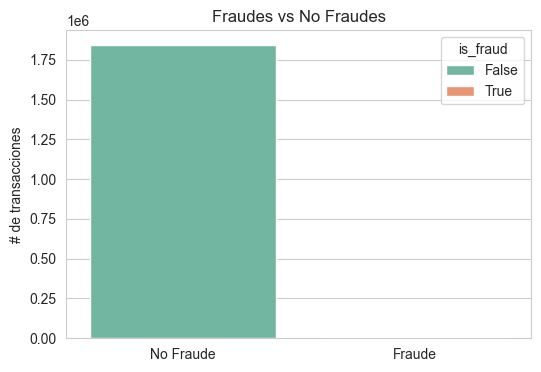

In [11]:
ClassCounts = dataframe['is_fraud'].value_counts()
ClassPercentages = dataframe['is_fraud'].value_counts(normalize=True) * 100

print(pd.concat([ClassCounts, ClassPercentages.rename('percentage')], axis=1))

sns.set_style("whitegrid")
plt.figure(figsize=(6,4))
sns.countplot(x='is_fraud', data=dataframe, palette='Set2', hue='is_fraud')
plt.title("Fraudes vs No Fraudes")
plt.xticks([0,1], ['No Fraude', 'Fraude'])
plt.ylabel("# de transacciones")
plt.xlabel("")
plt.show()

Viendo la distribución de la variable objetivo, no es de extrañar que los modelos entrenados con este dataset tengan muchos falsos positivos. Pues la variable está exageradamente desbalanceada, es un 99.48% vs 0.52%, haciendo que cualquier modelo sin buenos parámetros favorezcan a una clase. Además, que con un dataset así, las métricas serán engañosas. Ya que aunque cuente con una precisión alta, esto será porque está clasificando a todos como un "No fraude", y como así es la mayoría, la probabilidad que haya acertado es alta, haciendo que las métricas no sean confiables.

### Distribución en montos

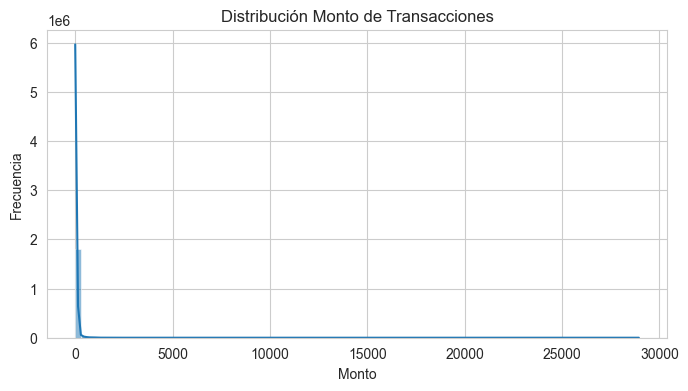

In [14]:
plt.figure(figsize=(8,4))
sns.histplot(data=dataframe, x='amt', bins=100, kde=True)
plt.title("Distribución Monto de Transacciones")
plt.xlabel("Monto")
plt.ylabel("Frecuencia")
#plt.xlim(0, 500)
plt.show()

### Caja y bigotes para variable objetivo

C:\Users\ealva\AppData\Local\Temp\ipykernel_24408\3266903531.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataframe, x='is_fraud', y='amt', palette='Set1')


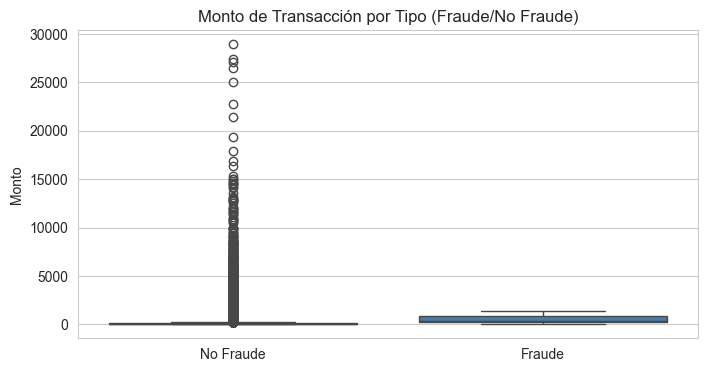

In [15]:
plt.figure(figsize=(8,4))
sns.boxplot(data=dataframe, x='is_fraud', y='amt', palette='Set1')
plt.title("Monto de Transacción por Tipo (Fraude/No Fraude)")
plt.xticks([0,1], ['No Fraude', 'Fraude'])
plt.xlabel("")
plt.ylabel("Monto")
#plt.ylim(0, 500)
plt.show()

### Correlación entre variables

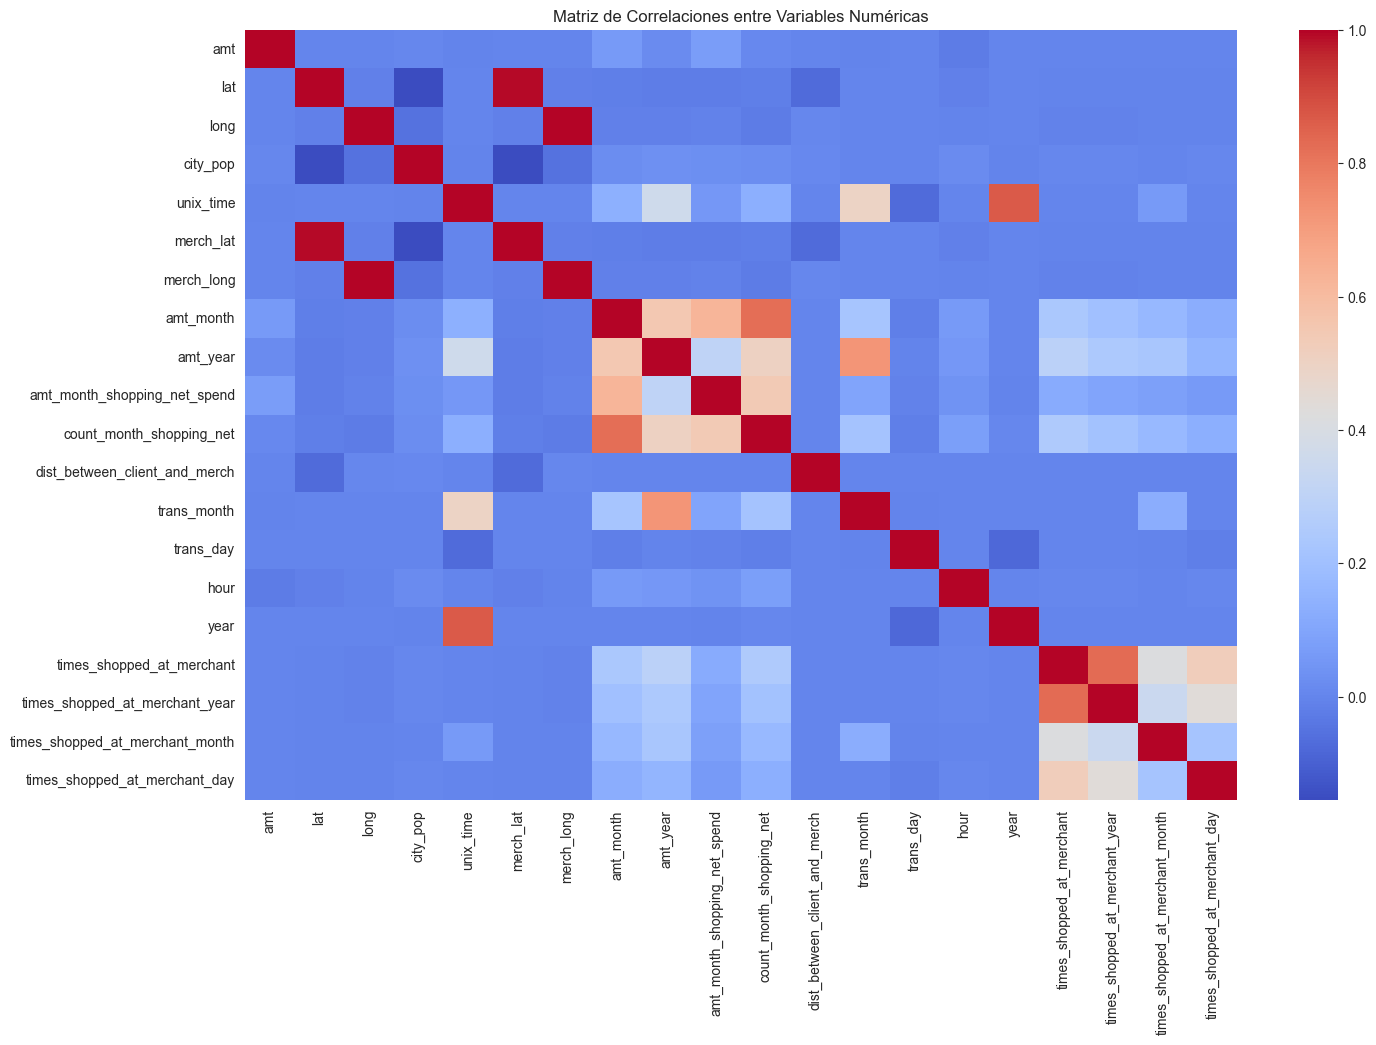

In [18]:
numericFeatures = dataframe.select_dtypes(include=[np.number]).columns.tolist()
correlationMatrix = dataframe[numericFeatures].corr()

plt.figure(figsize=(16,10))
sns.heatmap(correlationMatrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Matriz de Correlaciones entre Variables Numéricas")
plt.show()

C:\Users\ealva\AppData\Local\Temp\ipykernel_24408\117902738.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=CategoryCounts.values, y=CategoryCounts.index, palette='viridis', order=CategoryCounts.index)


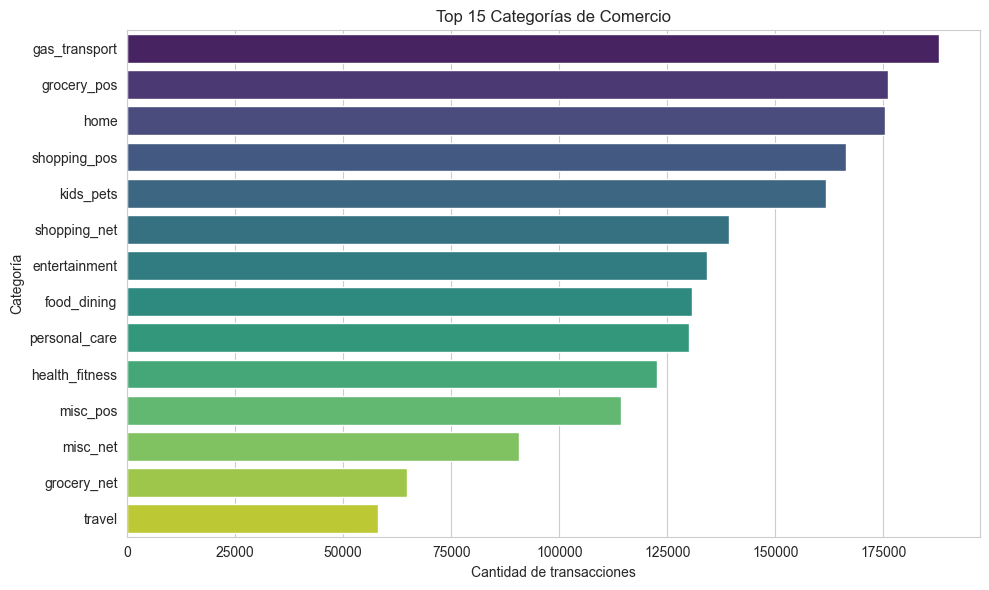

In [ ]:
plt.figure(figsize=(10,6))
CategoryCounts = dataframe['category'].value_counts().sort_values(ascending=False)

sns.barplot(x=CategoryCounts.values, y=CategoryCounts.index, palette='viridis', order=CategoryCounts.index)
plt.title("Top 15 Categorías de Comercio")
plt.xlabel("Cantidad de transacciones")
plt.ylabel("Categoría")
plt.tight_layout()
plt.show()
